In [387]:
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt

# 1. Webscapring ProLivesport

In [17]:
def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

Get from the main result page all the race result accessible on prolivesport

In [18]:
url = "https://www.prolivesport.fr/resultat-classement/"

In [19]:
html = requests.get(url).text

In [20]:
soup = BeautifulSoup(html)

In [21]:
table = soup.find_all(name = "table")[0]

In [22]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names
for th in table.find_all("th") :
    a = extract_column_from_header(th)
    if a is not None :
        if len(a) > 0 :
            column_names.append(a)
        else : 
            continue
    else:
        continue

In [23]:
print(column_names)

['Date épreuve', 'Nom épreuve', 'Lieu épreuve', 'Catégorie', 'Catégories']


In [69]:
rows = table.find_all('tr')
result_dict= dict.fromkeys(column_names)

result_dict['Date épreuve'] = []
result_dict['Nom épreuve'] = []
result_dict['Lieu épreuve'] = []
result_dict['Catégorie'] = []
result_dict['Catégories'] = []

# Initialize empty lists to store the table data
for row in rows:
    cols = row.find_all(['td'])  # Find both data cells (td) and header cells (th)
    cols = [col.get_text(strip=True) for col in cols]
    if cols :
        if cols[0]=="" :
            continue
        else :
            date = cols[0]
            result_dict["Date épreuve"].append(date)
    
            name = cols[1]
            result_dict["Nom épreuve"].append(name)
    
            place = cols[2]
            result_dict["Lieu épreuve"].append(place)
    
            cat_race = cols[3]
            result_dict["Catégorie"].append(cat_race)
    
            cat_result = cols[4]
            result_dict["Catégories"].append(cat_result)
    else :
        continue
    

In [60]:
print(rows[:5])

[<tr>
<th>Date épreuve</th>
<th>Nom épreuve</th>
<th>Lieu épreuve</th>
<th>Catégorie</th>
<th>Catégories</th>
</tr>, <tr>
<td>17/09/2023</td>
<td><strong>Swimrun de l'Aa 2023</strong><br/><i></i></td>
<td>Gravelines<br/><br/>Nord / Hauts-de-France</td>
<td>FF TRI -&gt; Swimrun</td>
<td>
<a href="/index.php?chap=event&amp;sub=liveV3&amp;eventId=898" target="_blank">LIVE</a>
</td>
</tr>, <tr><td colspan="5"><hr/></td></tr>, <tr>
<td>17/09/2023</td>
<td><strong>Combiné Triathlon / Duathlon Ardres 2023</strong><br/><i></i></td>
<td>Ardres<br/><br/>Pas-de-Calais / Hauts-de-France</td>
<td>FF TRI -&gt; Triathlon / Duathlon</td>
<td>
<a href="/index.php?chap=event&amp;sub=liveV3&amp;eventId=891" target="_blank">LIVE</a>
</td>
</tr>, <tr><td colspan="5"><hr/></td></tr>]


In [70]:
df = pd.DataFrame({ key:pd.Series(value) for key, value in result_dict.items() })

In [71]:
df

,Date épreuve,Nom épreuve,Lieu épreuve,Catégorie,Catégories
0,17/09/2023,Swimrun de l'Aa 2023,GravelinesNord / Hauts-de-France,FF TRI -> Swimrun,LIVE
1,17/09/2023,Combiné Triathlon / Duathlon Ardres 2023,ArdresPas-de-Calais / Hauts-de-France,FF TRI -> Triathlon / Duathlon,LIVE
2,17/09/2023,Grand Prix Duathlon 2023 - FinaleChampionnats ...,AvallonCentre,FF TRI -> Duathlon,LIVE GRAND PRIX
3,17/09/2023,Boucles dunkerquoises 2023,DunkerqueNord / Hauts-de-France,FFA -> Athlétisme running route,LIVE
4,10/09/2023,Championnats de France ParaTriathlon,Saint-Jean-de-MontsVendée / Pays-de-la-Loire,FF TRI -> Triathlon,LIVE PARA
...,...,...,...,...,...
471,14/06/2014,La ronde Zen & Solidaires en peloton,La Madeleine (Lille),Course à pied - Hors stade,Course jeunesLa ronde Zen & Solidaire - 7KmRel...
472,29/05/2014,Les 4h de Cassel - 1ère édition,Cassel,Cyclisme - VTT,Accès au live
473,18/05/2014,Lille - Hardelot 2014,"Lille, Hardelot",Cyclisme - CycloTourisme,Accès au live
474,24/11/2013,Cyclo-Cross Merville EOLYS,Merville,Cyclisme - Cyclo-Cross,PupilleBenjaminMinimeCadetJuniorElite-Non Elite


Prolivesport contain the result of 476 events

In [95]:
# List of substrings to search for
#my_list_1 = ['Duathlon']
my_list_2 = ["Grand Prix FF TRI Duathlon",'Grand Prix Duathlon',"GrandPrix","Championnats de France des Clubs FFTRI de Division 1"]
# Create a boolean mask to filter rows
#mask_1 = df["Catégorie"].str.contains('|'.join(my_list_1))
mask_2 = df["Nom épreuve"].str.contains('|'.join(my_list_2))

# Use the mask to filter rows in the DataFrame
filtered_df = df[mask_2].reset_index().drop(["index"],axis=1)
filtered_df

,Date épreuve,Nom épreuve,Lieu épreuve,Catégorie,Catégories
0,17/09/2023,Grand Prix Duathlon 2023 - FinaleChampionnats ...,AvallonCentre,FF TRI -> Duathlon,LIVE GRAND PRIX
1,28/05/2023,Grand Prix Duathlon 2023 - Etape 4Championnats...,NoyonOise / Hauts-de-France,FF TRI -> Duathlon,LIVE GRAND PRIX
2,28/05/2023,Grand Prix Duathlon 2023 - Etape 3Championnats...,Mont-Saint-AignanSeine-Maritime / Normandie,FF TRI -> Duathlon,LIVE GRAND PRIX
3,21/05/2023,Grand Prix Duathlon 2023Championnats de France...,CalaisPas-de-Calais / Hauts-de-France,FF TRI -> Duathlon,LIVE
4,24-25/09/2022,Grand Prix FF TRI Duathlon 2022 - Finale - Ava...,AvallonFF TRI / DuarhlonLIVE GRAND PRIX FF TRI,FF TRI / Duarhlon,LIVE GRAND PRIX FF TRI
5,28/08/2022,Grand Prix FF TRI Duathlon 2022 - Etape 4 - Mo...,Mont-Saint-AignanSeine Maritime / Normandie,FF TRI / Duarhlon,LIVE GRAND PRIX FF TRI
6,12/06/2022,Grand Prix Duathlon Les Herbiers 20223e étape ...,Mesnard-La-BarotièresVendée / Pays-de-la-Loire,FF TRI / Duathlon,LIVE CLM
7,15/05/2022,Grand Prix Duathlon Saint Avertin 2022Champion...,Saint AvertinVar / Provence-Alpes-Cote-d'Azur,FF TRI / Triathlon,LIVE GP
8,03/04/2022,Grand Prix FF TRI Duathlon 2022 - Etape 1 - Pa...,ParthenayDeux-Sèvres / Nouvelle-Aquitaine,FF TRI / Duarhlon,LIVE GRAND PRIX FF TRI
9,27/06/2021,Duathlon Parthenay 2021Championnats de France ...,ParthenayDeux-sèvres / Nouvelle-Aquitaine,FF Triathlon / Duathlon,RESULTATS COMPLETS


24 Duathlon grand prix event registered on Prolivesport, almost none of them with the same name format.

We will focus on the period 2018-2023 for the analysis

# 2. Create one dataframe per year 

In [411]:
def race_dataframe (year,event,race,page):  
    url = f"http://www.prolivesport.fr/{year}/{event}/{race}/{page}.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    if soup.find('table') is not None:
        table = soup.find_all(name = "table")[0]

        column_names = []
        for th in table.find_all("th") :
            a = extract_column_from_header(th)
            if a is not None :
                if len(a) > 0 :
                    column_names.append(a)
                else : 
                    continue
            else:
                continue
        result_dict= dict.fromkeys(column_names)
        for col in column_names :
            result_dict[col] = []

        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all(['td'])  # Find both data cells (td) and header cells (th)
            cols = [col.get_text(strip=True) for col in cols]
            if cols :
                if cols[0]=="" :
                    continue
                else :
                    for index,column in enumerate(column_names):
                        result_dict[column].append(cols[index])
            else :
                continue
        df_test = pd.DataFrame({ key:pd.Series(value) for key, value in result_dict.items() })
        df_test["Event"]=event
        df_test["Race"] = race
    else :
        df_test = pd.DataFrame()
    return df_test

In [412]:
#def set_type(df, time_col):
#    # Convert 'Temps Athlète' columns to time format
#    for col in time_col:
#        try:
#            df[col] = pd.to_datetime(df[col], format='%H:%M:%S').dt.time
#        except ValueError:
#            # Handle rows with inconsistent data, e.g., "P => P"
#            df[col] = pd.to_datetime(df[col].str.split('P', n=1, expand=True)[0].str[:-1], format='%H:%M:%S').dt.time# Set to 'Not-a-Time' for inconsistent rows
#    return df

In [413]:
# Handling DNF in class_etape_df
def DNF_handling(class_df,scratch_df):
    filtered_df = class_df[class_df['Rang'] == "DNF"]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        max_time = max(scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["Temps"])
        class_df.at[index, "Temps Athlète 3"] = max_time
    scratch_df.rename(columns={"Temps":"Total"},inplace=True)
    #Drop useless column
    scratch_df = scratch_df.drop(columns=["Dossard"])
    
    return class_df,scratch_df

In [414]:
#Handling missing value mostly bike split
def Missing_handling(scratch_df) :
    
    ### For Cap1 
    scratch_df = scratch_df.replace("00:00:00", np.nan)
    filtered_df = scratch_df[scratch_df['CaP1'].isna()]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        mean_time = scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["CaP1"].mean()
        scratch_df.at[index, "CaP1"] = mean_time

    ### For bike
    filtered_df = scratch_df[scratch_df['Vélo'].isna()]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        mean_time = scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["Vélo"].mean()
        scratch_df.at[index, "Vélo"] = mean_time

    ### for Cap2
    filtered_df = scratch_df[scratch_df['CaP2'].isna()]

    for index, row in filtered_df.iterrows():
        event = row.iloc[6]
        race = row.iloc[7]
        # Use proper parentheses to combine conditions
        mean_time = scratch_df[(scratch_df['Event'] == event) & (scratch_df['Race'] == race)]["CaP2"].mean()
        scratch_df.at[index, "CaP2"] = mean_time
    return scratch_df

In [427]:
#Add new column Delta time compare to fastest in each split (run/bike/run) and delta time to first at the end for scratch_df_2023
def delta_scratch(scratch_df):
    
    List_column_delta = ["Total","CaP1","Vélo","Vélo Cum.","CaP2"]

    for col in List_column_delta:

        scratch_df[col] = pd.to_timedelta(scratch_df[col])

        # Calculate the minimum time for each unique combination of "Race" and "Event"
        scratch_df["Min Time"] = scratch_df.groupby(["Race", "Event"])[col].transform("min")

        # Calculate the "Delta time to fastest" column
        scratch_df[f"Gap to 1st {col} (s)"] = (scratch_df[col] - scratch_df["Min Time"]).dt.total_seconds()

        scratch_df = scratch_df.drop(columns=["Min Time"])
    scratch_df['Gap to 1st CaP1 (s)'] = scratch_df['Gap to 1st CaP1 (s)'].astype(float)
    scratch_df['Gap to 1st Vélo Cum. (s)'] = scratch_df['Gap to 1st Vélo Cum. (s)'].astype(float)
    scratch_df['Gap to 1st Total (s)'] = scratch_df['Gap to 1st Total (s)'].astype(float)
    return scratch_df

In [428]:
#Add delta time to 3rd rider of team compare to first of race for class_etape_df_2023
def delta_3rd(class_etape_df):
    class_etape_df["Temps Athlète 3"] = pd.to_timedelta(class_etape_df["Temps Athlète 3"])
    class_etape_df["Temps Athlète 1"] = pd.to_timedelta(class_etape_df["Temps Athlète 1"])

    # Calculate the minimum time for each unique combination of "Race" and "Event"
    class_etape_df["Min Time"] = class_etape_df.groupby(["Race", "Event"])["Temps Athlète 1"].transform("min")

    # Calculate the "Delta time to fastest" column
    class_etape_df[f"Gap to 1st for 3rd athlete per team (s)"] = (class_etape_df["Temps Athlète 3"] - class_etape_df["Min Time"]).dt.total_seconds()

    class_etape_df = class_etape_df.drop(columns=["Min Time"])
    class_etape_df['Gap to 1st for 3rd athlete per team (s)'] = class_etape_df['Gap to 1st for 3rd athlete per team (s)'].astype(float)
    return class_etape_df

In [446]:
def race_dynamics_plot(scratch_df,race):
    
    filtered_df = scratch_df[scratch_df['Race'] == race]
    # Get unique values in the "Event" column
    unique_events = filtered_df['Event'].unique()

    # Create a line plot for each unique event
    for event in unique_events:
        event_df = filtered_df[filtered_df['Event'] == event]

        # Create a subplot for each row in event_df
        plt.figure(figsize=(18, 10))
        for index, row in event_df.iterrows():
            x_values = ['Gap to 1st CaP1 (s)', 'Gap to 1st Vélo Cum. (s)', 'Gap to 1st Total (s)']
            y_values = [row[x] for x in x_values]
            plt.plot(x_values, y_values, label=event_df["Rang"][index])

        # Customize the plot
        plt.title(f'Event: {event}')
        plt.xlabel('Gap Type')
        plt.ylabel('Gap (seconds)')
        plt.legend()

        # Show or save the plot as needed
        plt.show()

## 2.1. Create 2023 

In [465]:
#Let's find the data for 2023 by creating a loop
List_event = ["parthenay","calais","mont-saint-aignan","noyon","avallon"]
List_race = ["D1F","D2F","D1H","D2H"]
List_page = ["classement-etape","scratch"]
year = "live-grand-prix-duathlon-2023"
class_etape_df_2023 = pd.DataFrame()
scratch_df_2023 = pd.DataFrame()

for page in List_page :
    if page == "classement-etape":
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            class_etape_df_2023 = pd.concat([class_etape_df_2023,df_race])
    else :
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            scratch_df_2023 = pd.concat([scratch_df_2023,df_race])
            
for col in ["CaP1","Vélo","Vélo Cum.","CaP2"]:
        scratch_df_2023[col] = scratch_df_2023[col].str.split(' ',n=2,expand=True)[0]

for col in ["Athlète 1","Athlète 2","Athlète 3"]:
    class_etape_df_2023[f"Temps {col}"] = class_etape_df_2023[col].str.split('(', n=2, expand=True)[1].str[:-1]
    class_etape_df_2023[col] = class_etape_df_2023[col].str.split('(', n=2, expand=True)[0]
    


In [466]:
#Calais was a team format so we can't use this event to compare with other
scratch_df_2023 = scratch_df_2023[scratch_df_2023['Event'] != 'calais'].reset_index().drop(columns=["index"])
class_etape_df_2023 = class_etape_df_2023[class_etape_df_2023['Event'] != 'calais'].reset_index().drop(columns=["index"])
#Adjust manually a row Mael Gouret mont saint aignan, last lap time is in T2 
scratch_df_2023.at[625,'Vélo']= "00:27:53"
scratch_df_2023.at[625,'Vélo Cum.']= "00:42:55"
scratch_df_2023.at[625,'#2']= "00:00:38"

In [467]:
class_etape_df_2023, scratch_df_2023 = DNF_handling(class_etape_df_2023, scratch_df_2023)

In [468]:
scratch_df_2023 = Missing_handling(scratch_df_2023)

In [469]:
scratch_df_2023 = delta_scratch(scratch_df_2023)

In [470]:
class_etape_df_2023 = delta_3rd(class_etape_df_2023)

In [ ]:
def plot_race_dynamics(scratch_df):
    

In [423]:
scratch_df_2023

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,...,CaP2,U23,A.S.,Event,Race,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
0,1.,MARION LEGRAND,FRA,S3 (1e),LES TRITONS MELDOIS,0 days 01:00:39,0 days 00:17:03,00:00:37,0 days 00:33:38,0 days 00:51:17,...,0 days 00:08:52,,,parthenay,D1F,0.0,1.0,28.0,0.0,0.0
1,2.,MARION LE GOFF,FRA,S2 (1e),PONTIVY TRIATHLON,0 days 01:00:50,0 days 00:17:02,00:00:37,0 days 00:33:42,0 days 00:51:20,...,0 days 00:08:57,,,parthenay,D1F,11.0,0.0,32.0,3.0,5.0
2,3.,MAURINE RICOUR,BEL,S3 (2e),LES TRITONS MELDOIS,0 days 01:00:53,0 days 00:17:03,00:00:39,0 days 00:33:39,0 days 00:51:21,...,0 days 00:09:01,,,parthenay,D1F,14.0,1.0,29.0,4.0,9.0
3,4.,EMMA WASSER,FRA,S1 (1e),A.S.P.T.T. STRASBOURG TRI,0 days 01:00:56,0 days 00:17:32,00:00:38,0 days 00:33:10,0 days 00:51:18,...,0 days 00:09:07,U23,,parthenay,D1F,17.0,30.0,0.0,1.0,15.0
4,5.,CLAUDIA KELSALL,GBR,S2 (2e),LES TRITONS MELDOIS,0 days 01:01:27,0 days 00:17:04,00:00:39,0 days 00:33:40,0 days 00:51:22,...,0 days 00:09:32,,,parthenay,D1F,48.0,2.0,30.0,5.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,75.,RAPHAEL BENEZIT,FRA,M3 (1e),LE PUY-EN-VELAY TRIATHLON,0 days 01:07:01,0 days 00:16:42,00:00:56,0 days 00:38:17,0 days 00:55:54,...,0 days 00:09:51,,,avallon,D2H,587.0,134.0,419.0,492.0,122.0
986,76.,MEIRE BENEZET,FRA,S1 (22e),STADE FRANCAIS,0 days 01:07:36,0 days 00:16:49,00:00:53,0 days 00:37:57,0 days 00:55:38,...,0 days 00:10:45,U23,*,avallon,D2H,622.0,141.0,399.0,476.0,176.0
987,77.,ROBIN BISTEUR,FRA,S2 (26e),STADE FRANCAIS,0 days 01:07:57,0 days 00:15:57,00:00:54,0 days 00:39:31,0 days 00:56:21,...,0 days 00:10:13,,,avallon,D2H,643.0,89.0,493.0,519.0,144.0
988,78.,THEO MARGERIT,FRA,S2 (27e),VALLEE DE MONTMORENCY TRIATHLON,0 days 01:08:48,0 days 00:18:03,00:00:56,0 days 00:37:17,0 days 00:56:16,...,0 days 00:11:17,,,avallon,D2H,694.0,215.0,359.0,514.0,208.0


In [471]:
filtered_df = scratch_df_2023[scratch_df_2023['Race'] == "D1H"]
filtered_df = filtered_df[filtered_df['Event'] == "mont-saint-aignan"]
filtered_df.sort_values("Gap to 1st Vélo Cum. (s)")

,Rang,Athlète,Nation,Cat.,Club,Total,CaP1,#1,Vélo,Vélo Cum.,...,CaP2,U23,A.S.,Event,Race,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st Vélo Cum. (s),Gap to 1st CaP2 (s)
574,16.,ALEXYS BRUNEL,FRA,S2 (9e),LYS CALAIS TRIATHLON,0 days 00:48:14,0 days 00:14:04,00:00:29,0 days 00:25:16,0 days 00:39:48,...,0 days 00:07:59,,,mont-saint-aignan,D1H,46.0,35.0,0.0,0.0,59.0
560,2.,VALENTIN ANDRE,FRA,S3 (1e),LES TRITONS MELDOIS,0 days 00:47:35,0 days 00:13:30,00:00:27,0 days 00:25:54,0 days 00:39:51,...,0 days 00:07:15,,,mont-saint-aignan,D1H,7.0,1.0,38.0,3.0,15.0
589,31.,KILIAN CARPENTIER,FRA,S1 (8e),LYS CALAIS TRIATHLON,0 days 00:48:43,0 days 00:13:59,00:00:30,0 days 00:25:24,0 days 00:39:51,...,0 days 00:08:17,U23,,mont-saint-aignan,D1H,75.0,30.0,8.0,3.0,77.0
566,8.,EMILE BLONDEL HERMANT,FRA,S2 (5e),TEAM NOYON TRIATHLON,0 days 00:47:53,0 days 00:13:31,00:00:31,0 days 00:25:50,0 days 00:39:51,...,0 days 00:07:29,,,mont-saint-aignan,D1H,25.0,2.0,34.0,3.0,29.0
563,5.,MARTIN LAURENT,FRA,S2 (2e),EVREUX A.C. TRIATHLON,0 days 00:47:44,0 days 00:13:31,00:00:30,0 days 00:25:52,0 days 00:39:52,...,0 days 00:07:21,,,mont-saint-aignan,D1H,16.0,2.0,36.0,4.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,75.,ANTOINE VIERTAIX,FRA,S1 (29e),LYS CALAIS TRIATHLON,0 days 00:54:03,0 days 00:14:51,00:00:31,0 days 00:29:43,0 days 00:45:05,...,0 days 00:08:20,U23,,mont-saint-aignan,D1H,395.0,82.0,267.0,317.0,80.0
631,73.,GENGIS POUTEAU,FRA,S1 (28e),CAEN TRIATHLON,0 days 00:53:38,0 days 00:14:32,00:00:35,0 days 00:30:00,0 days 00:45:06,...,0 days 00:07:58,U23,*,mont-saint-aignan,D1H,370.0,63.0,284.0,318.0,58.0
634,76.,JULIEN FERANDEAU,FRA,S1 (30e),EVREUX A.C. TRIATHLON,0 days 00:55:33,0 days 00:14:52,00:01:28,0 days 00:29:41,0 days 00:46:01,...,0 days 00:08:57,U23,*,mont-saint-aignan,D1H,485.0,83.0,265.0,373.0,117.0
635,77.,EDOUARD NANCEL,FRA,S1 (31e),TEAM NOYON TRIATHLON,0 days 00:55:48,0 days 00:14:34,00:00:33,0 days 00:31:48,0 days 00:46:54,...,0 days 00:08:17,U23,,mont-saint-aignan,D1H,500.0,65.0,392.0,426.0,77.0


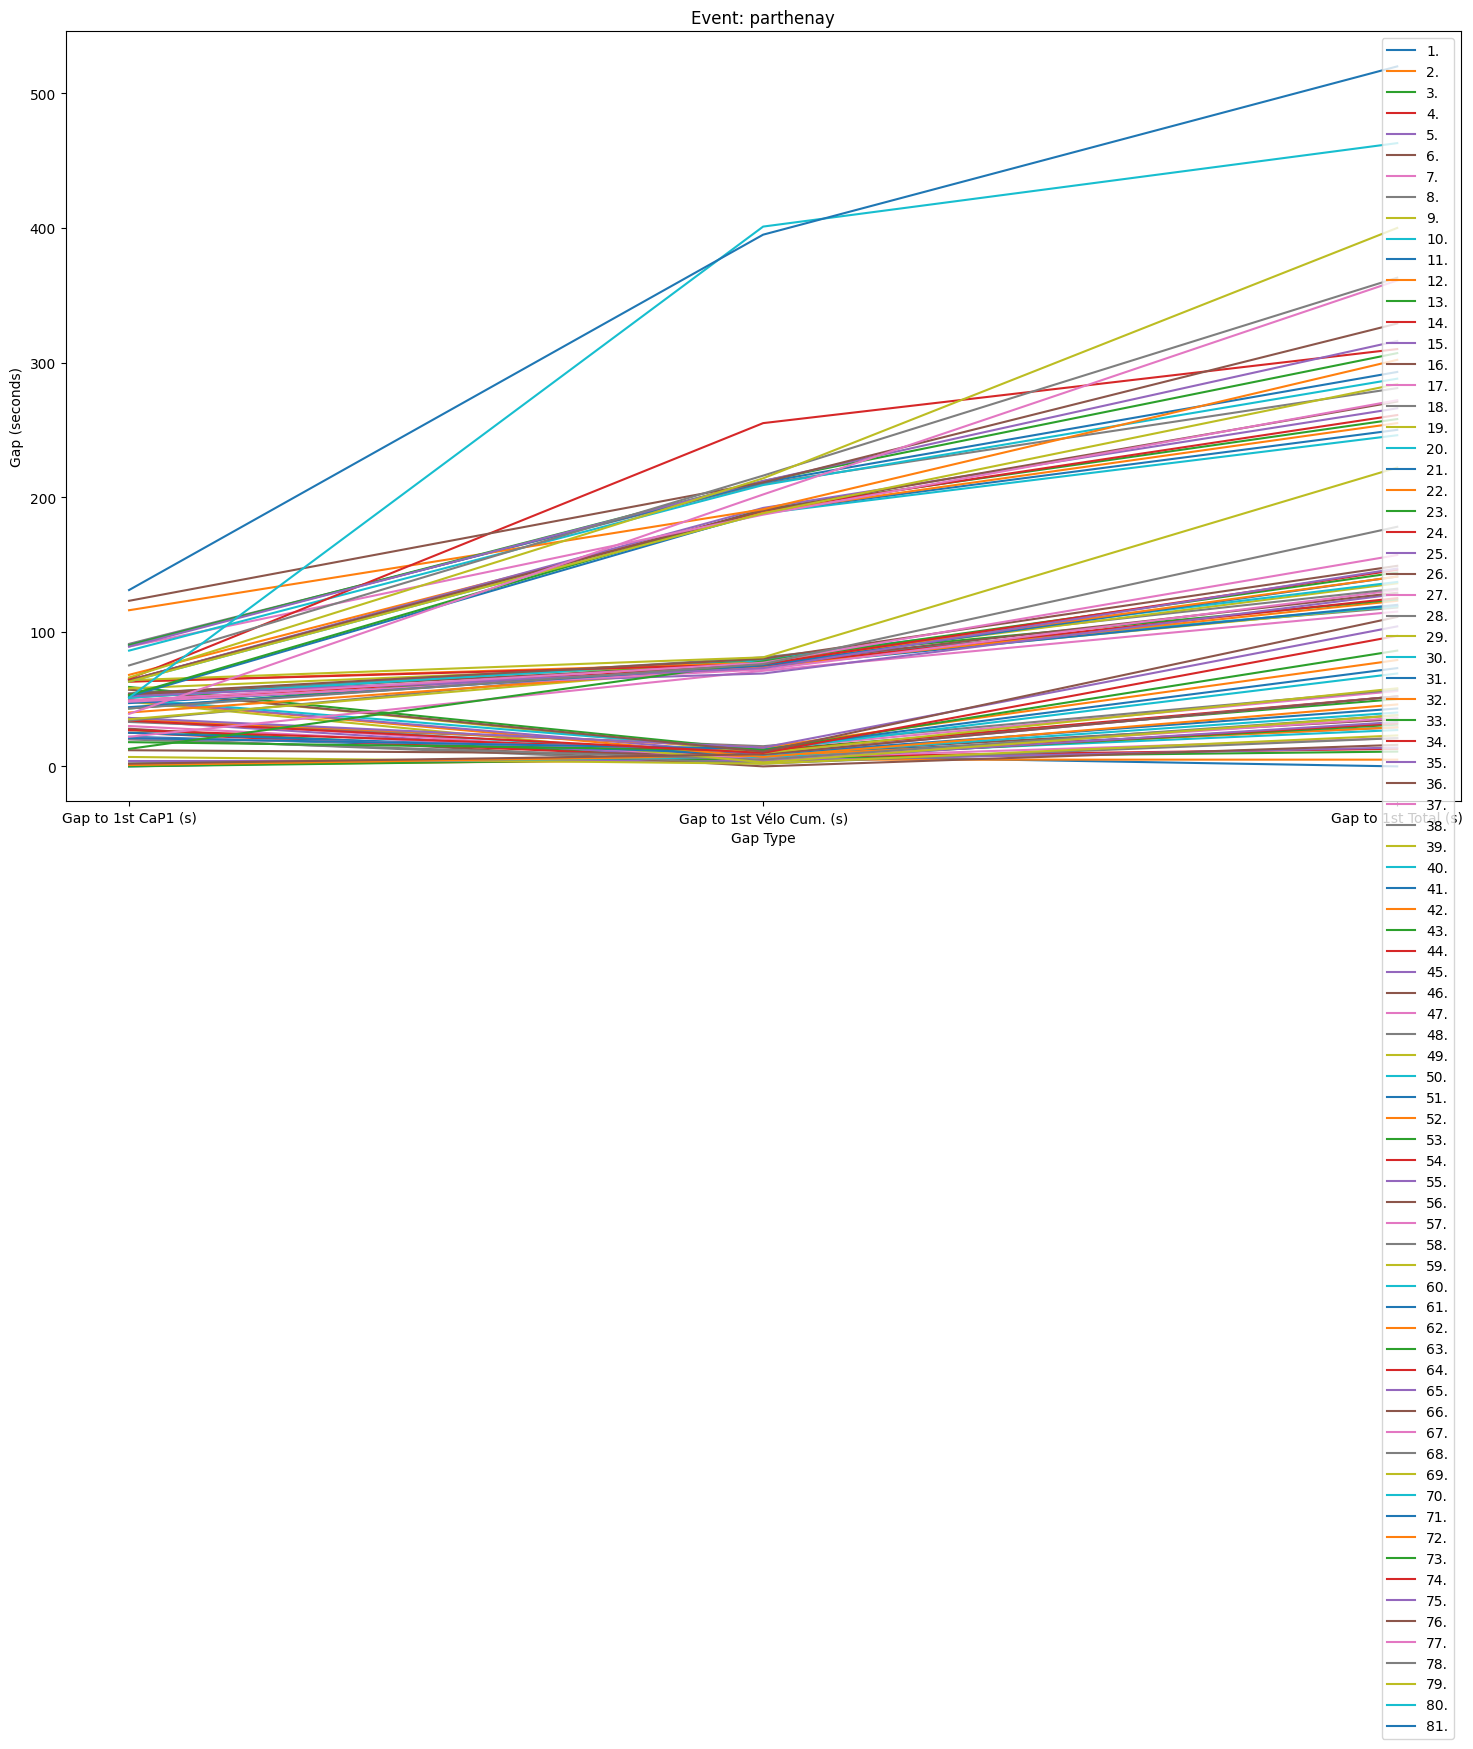

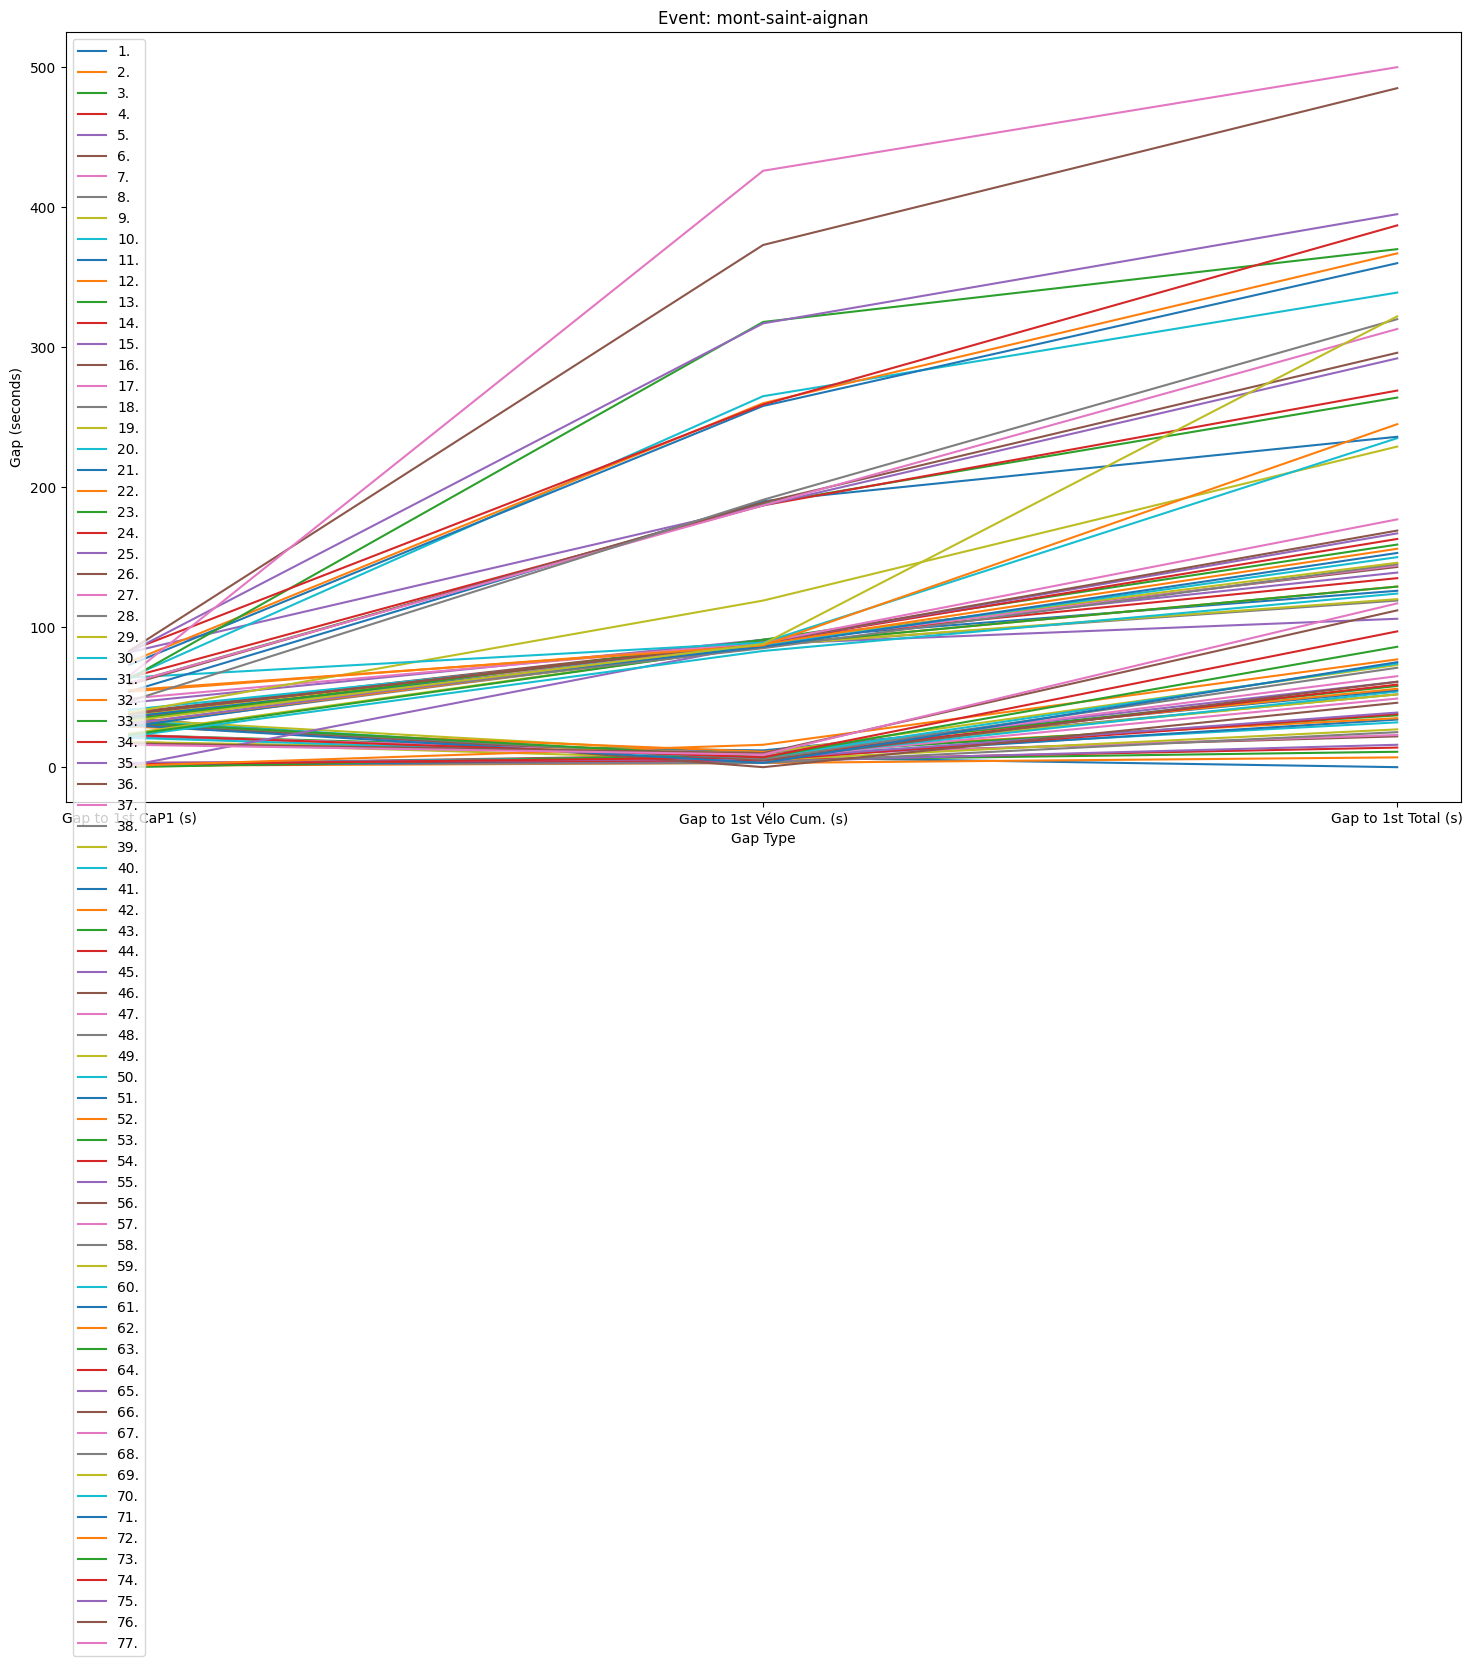

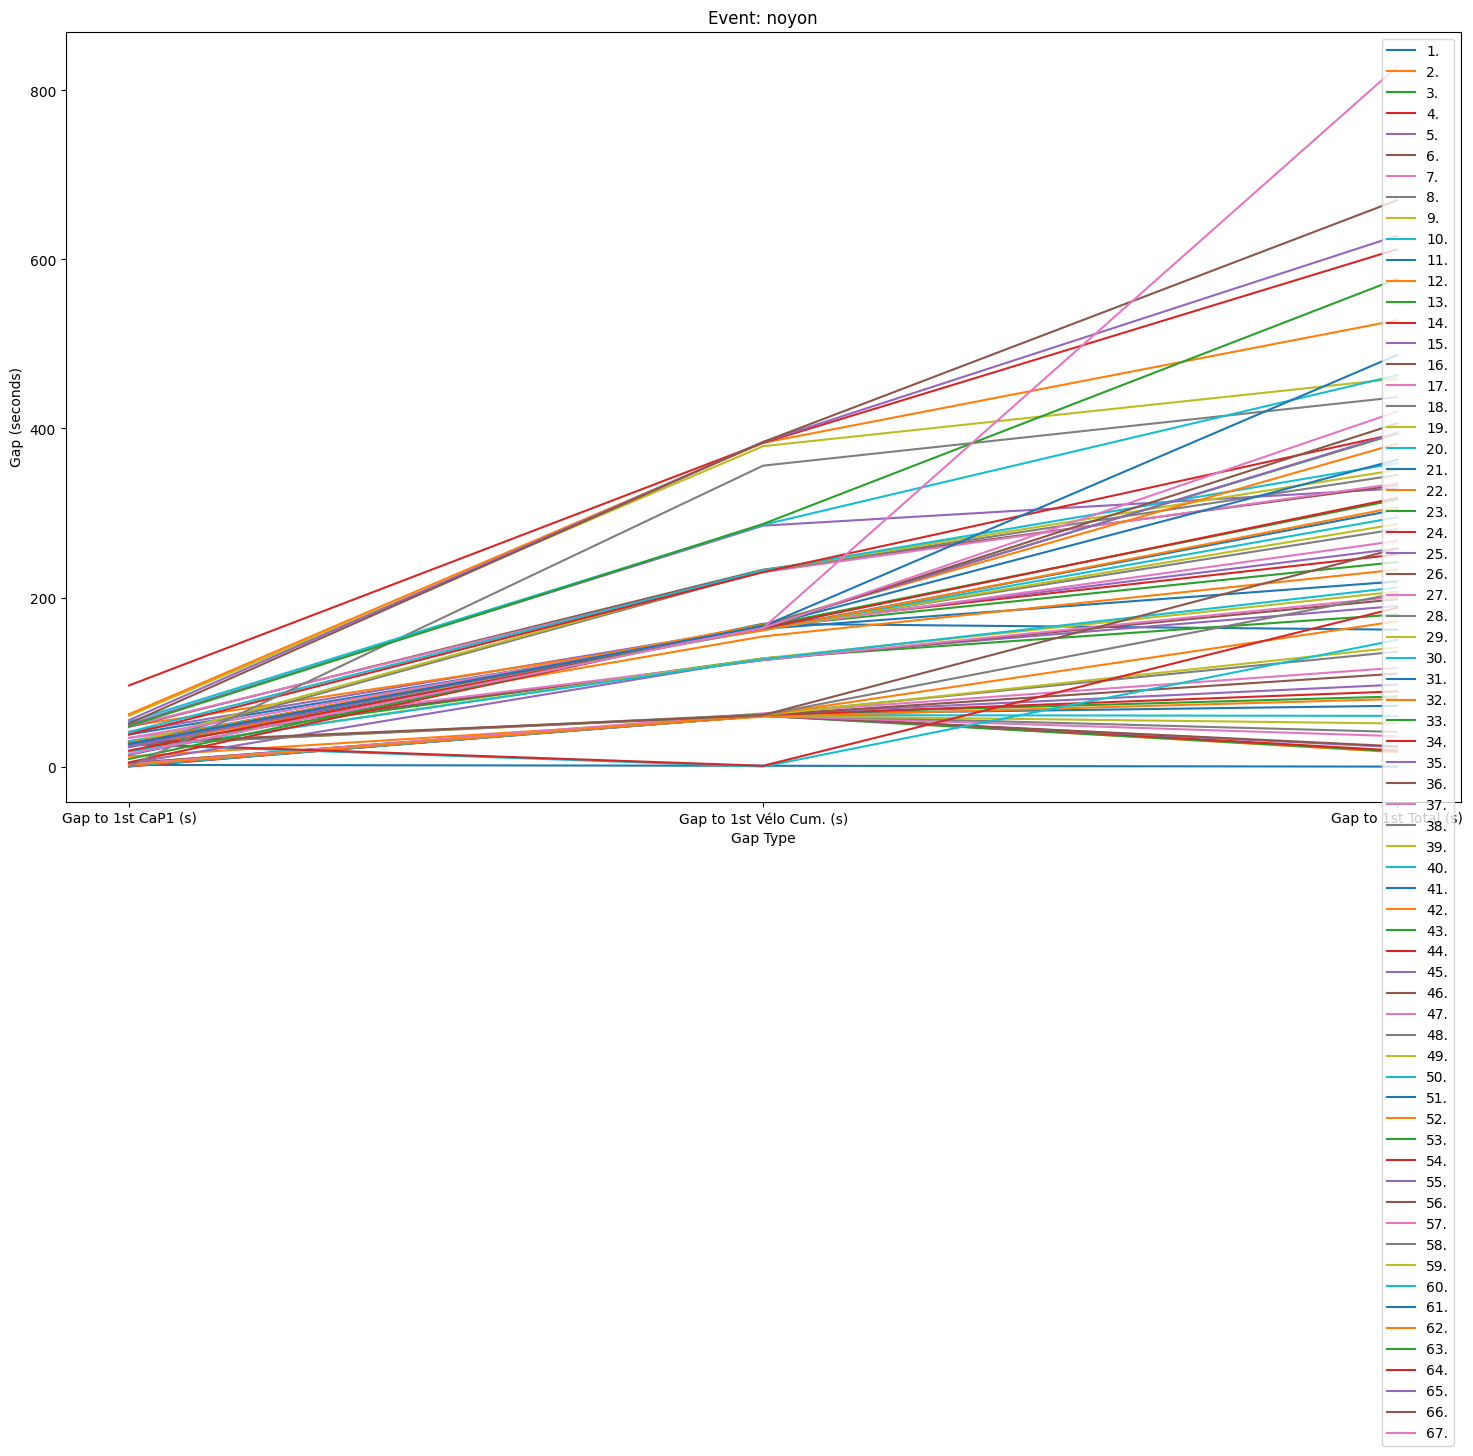

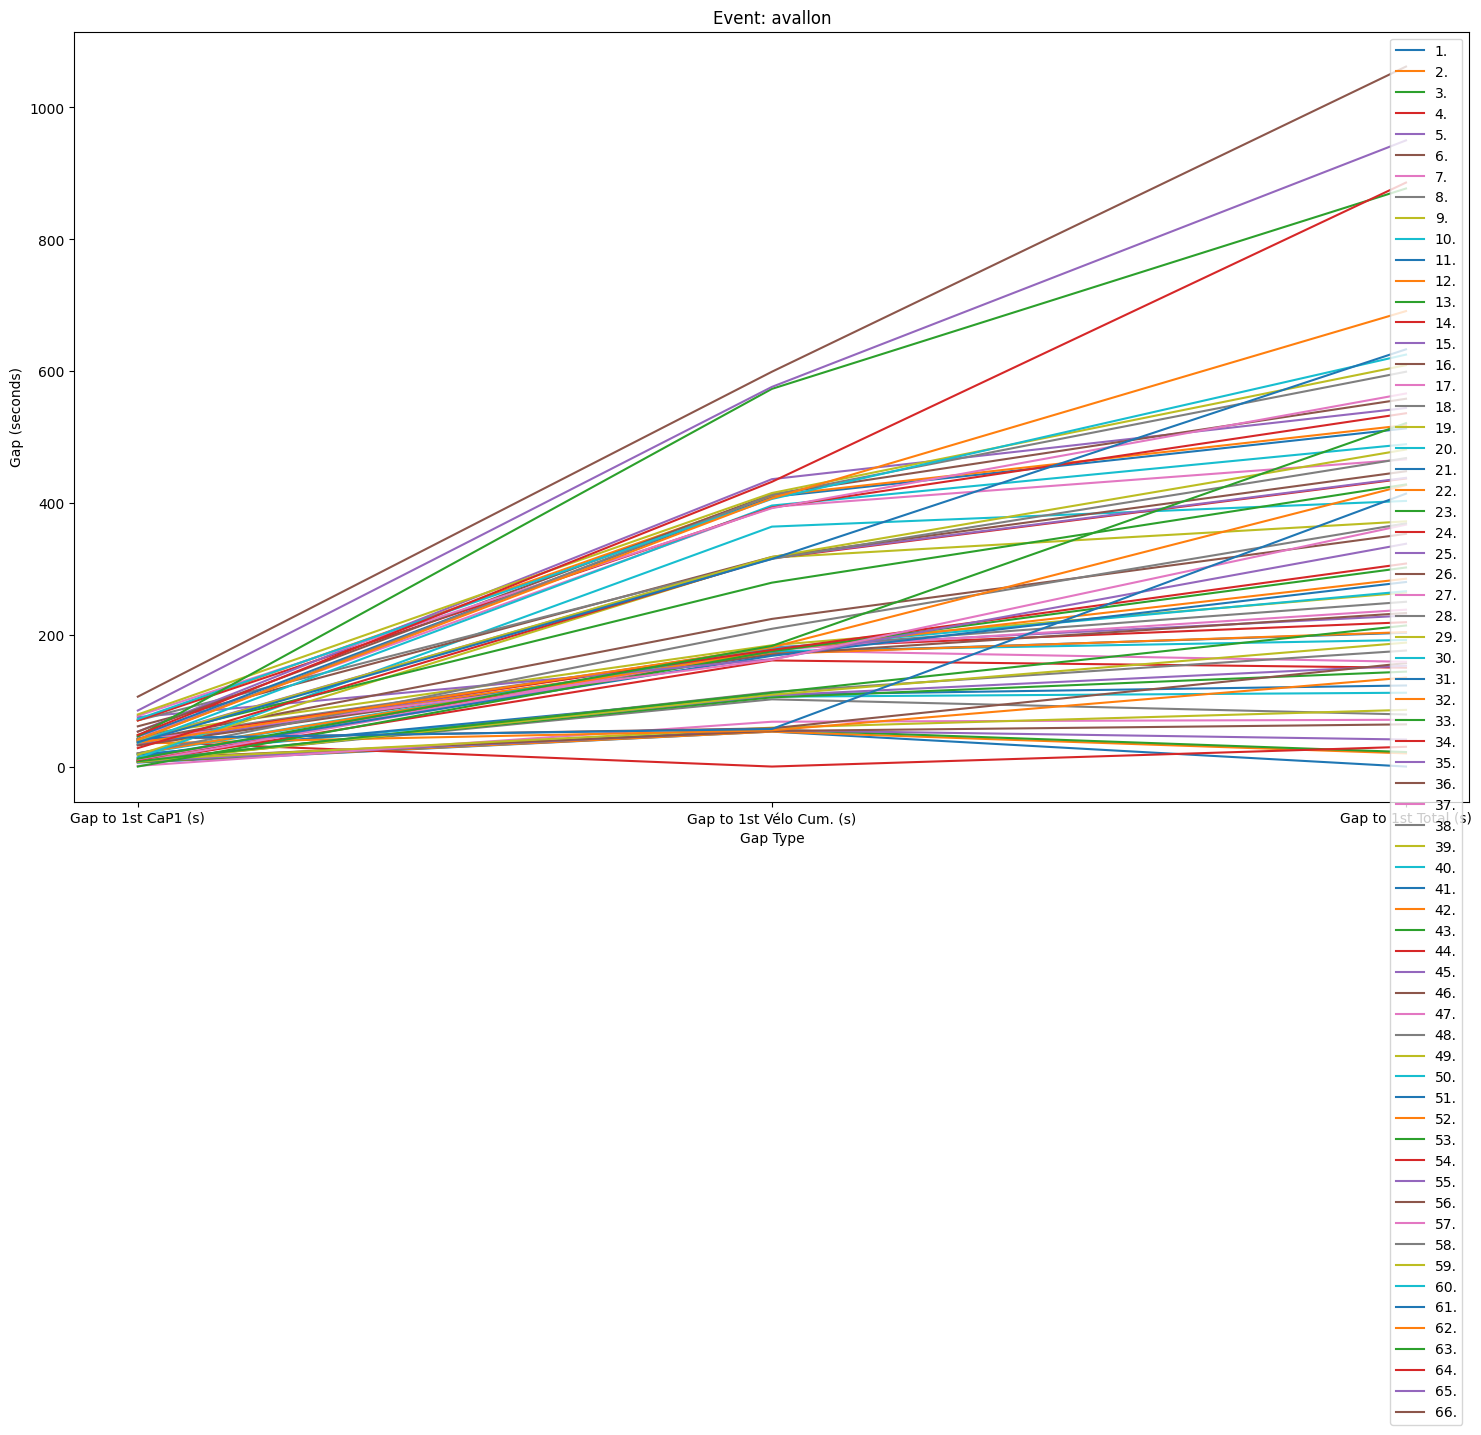

In [472]:
race_dynamics_plot(scratch_df_2023,"D1H")

In [384]:
class_etape_df_2023

,Rang,Club,Athlète 1,Athlète 2,Athlète 3,TOTAL,Event,Race,Temps Athlète 1,Temps Athlète 2,Temps Athlète 3,Gap to 1st for 3rd athlete per team (s)
0,1.,LES TRITONS MELDOIS,1. LEGRAND MARION,3. RICOUR MAURINE,5. KELSALL CLAUDIA,9 pts,parthenay,D1F,0 days 01:00:39,01:00:53,0 days 01:01:27,48.0
1,2.,A.S.P.T.T. 36 SPORTS NATURE,6. ROSE LUCIE,14. COUTANT EVA,25. MONMARTEAU SABRINA,45 pts,parthenay,D1F,0 days 01:01:41,01:02:22,0 days 01:03:24,165.0
2,3.,LYS CALAIS TRIATHLON,8. NIEUWENHUIJSEN KARIN,17. BROWN RACHEL ELISABETH,26. DELVINCOURT JOSEPHINE,51 pts,parthenay,D1F,0 days 01:01:55,01:02:35,0 days 01:03:28,169.0
3,4.,PONTIVY TRIATHLON,2. LE GOFF MARION,19. LE GUEN CAMILLE,37. WANHERDRICK ELODIE,58 pts,parthenay,D1F,0 days 01:00:50,01:03:07,0 days 01:05:40,301.0
4,5.,COTE D OPALE TRIATHLON CALAIS SAINT-OMER,15. HILLER ELEONORE,21. VALLOIS LAURA,23. ROLIN CAPUCINE,59 pts,parthenay,D1F,0 days 01:02:30,01:03:10,0 days 01:03:16,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...
217,12.,TRI VAL DE GRAY,43. OGIER MATTHIEU,46. SOL TIMOTHE,48. MOUSSAOUI SOFIANE,137 pts,avallon,D2H,0 days 01:01:40,01:01:55,0 days 01:02:34,320.0
218,13.,LE MANS TRIATHLON,34. EXMELIN ANTOINE,44. BELLOT JEANLOUP,64. PAVARD THOMAS,142 pts,avallon,D2H,0 days 01:00:54,01:01:41,0 days 01:05:44,510.0
219,14.,VALLEE DE MONTMORENCY TRIATHLON,32. GUICHARD MARTIN,58. BOVE PIERRE OLIVIER,61. ORHAN ALEXANDRE,151 pts,avallon,D2H,0 days 01:00:53,01:04:36,0 days 01:05:14,480.0
220,15.,CLERMONT TRIATHLON,55. SCHAAL FLORENT,60. JOURDAN JUSTIN,63. BERTRAND MATTEO,178 pts,avallon,D2H,0 days 01:04:06,01:04:48,0 days 01:05:39,505.0


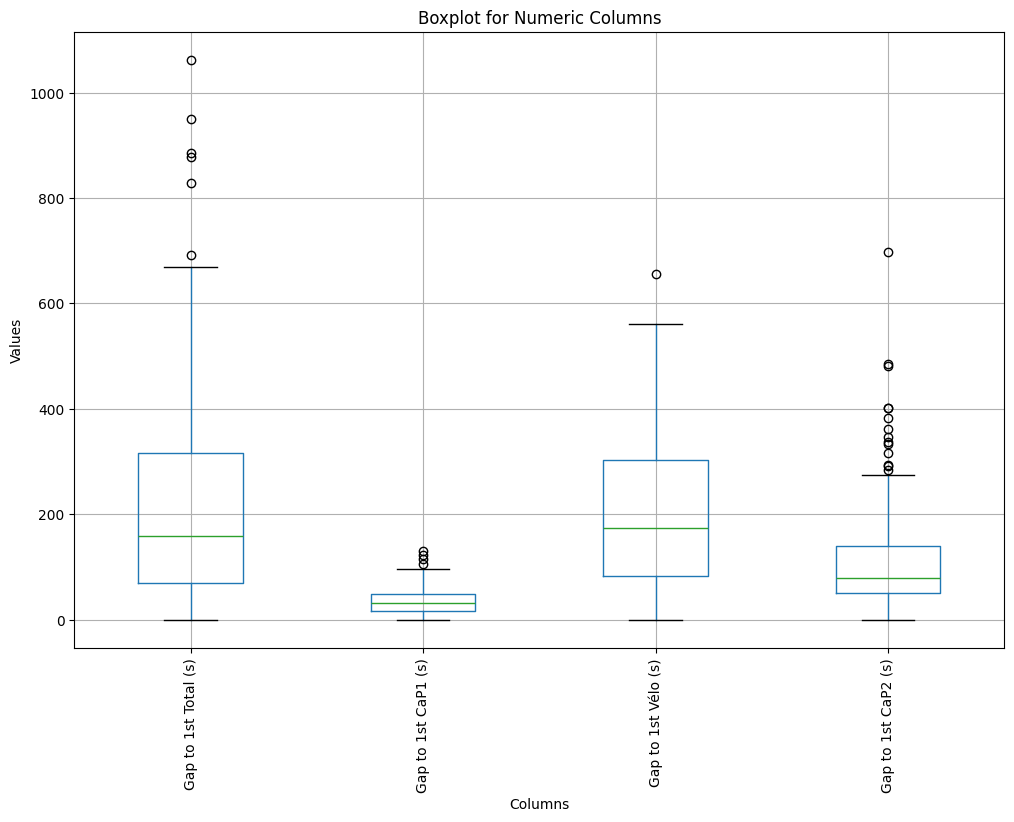

,Total,CaP1,Vélo,CaP2,Gap to 1st Total (s),Gap to 1st CaP1 (s),Gap to 1st Vélo (s),Gap to 1st CaP2 (s)
count,291,290,290,290,291.000000,290.000000,290.000000,290.000000
mean,0 days 01:05:50.938144329,0 days 00:14:59.520689655,0 days 00:36:42.358620689,0 days 00:12:49.175862068,218.089347,34.389655,202.379310,107.368966
std,0 days 00:15:31.240312861,0 days 00:00:43.499050455,0 days 00:10:03.105270937,0 days 00:05:04.452824915,186.176387,25.176537,135.119507,90.457039
min,0 days 00:47:28,0 days 00:13:29,0 days 00:20:53,0 days 00:07:00,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:52:39,0 days 00:14:40.250000,0 days 00:28:11,0 days 00:08:14.250000,70.000000,16.250000,84.000000,50.000000
50%,0 days 00:57:02,0 days 00:15:08,0 days 00:30:56.500000,0 days 00:09:12.500000,159.000000,32.500000,173.500000,79.000000
75%,0 days 01:20:06,0 days 00:15:27.750000,0 days 00:44:14,0 days 00:17:39.750000,316.000000,49.000000,304.000000,140.250000
max,0 days 01:39:10,0 days 00:17:01,0 days 00:56:53,0 days 00:26:28,1062.000000,131.000000,655.000000,698.000000


In [409]:
numeric_columns = scratch_df_2023.select_dtypes(include=['number'])[scratch_df_2023['Race'] == "D1H"]
plt.figure(figsize=(12, 8))
numeric_columns.boxplot(rot=90)
plt.title("Boxplot for Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()
numeric_columns.describe()

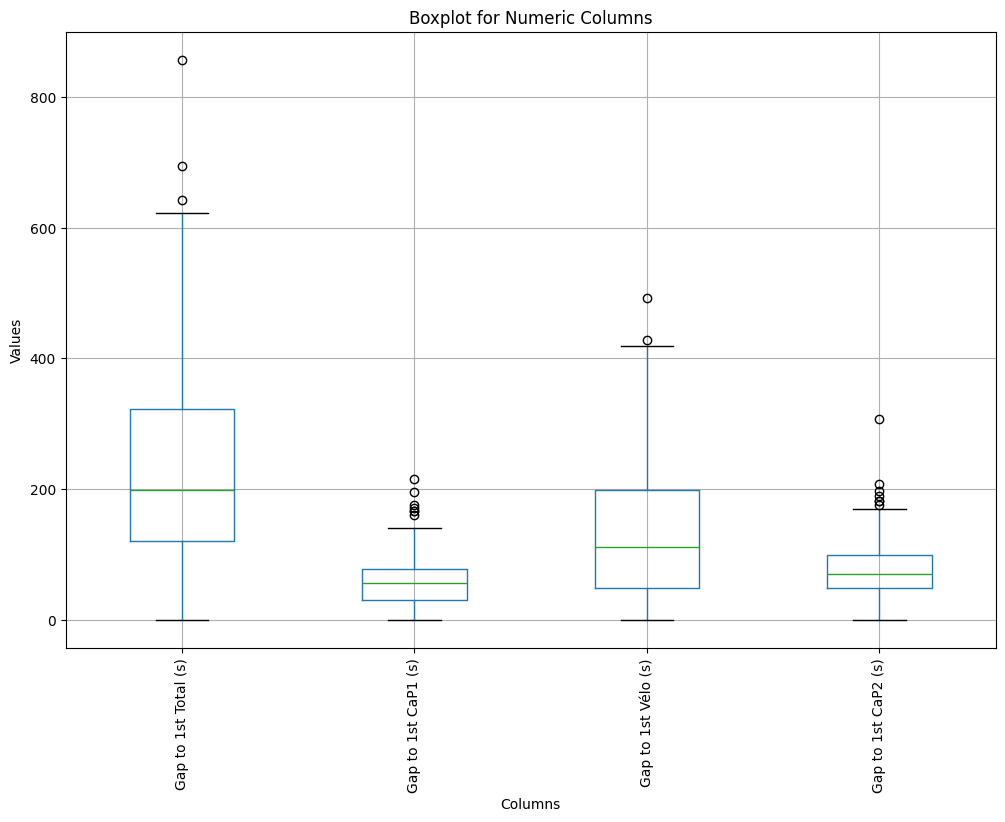

In [410]:
numeric_columns = scratch_df_2023.select_dtypes(include=['number'])[scratch_df_2023['Race'] == "D2H"]
plt.figure(figsize=(12, 8))
numeric_columns.boxplot(rot=90)
plt.title("Boxplot for Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

## 2.1. Create 2022

In [192]:
#Let's find the data for 2022 by creating a loop
List_event = ["parthenay","st-avertin","mesnard-la-barotiere","mont-saint-aignan","avallon"]
List_race = ["D1F","D2F","D1H","D2H"]
List_page = ["classement-etape","scratch"]
year = "live-grand-prix-duathlon-2022"
class_etape_df_2022 = pd.DataFrame()
scratch_df_2022 = pd.DataFrame()

for page in List_page :
    if page == "classement-etape":
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            class_etape_df_2022 = pd.concat([class_etape_df_2022,df_race])
    else :
        for race in List_race:
            df_race = pd.DataFrame()
            for event in List_event :
                df = race_dataframe(year,event, race, page)
                if df.empty :
                    continue
                else : 
                    df_race = pd.concat([df_race,df])
            scratch_df_2022 = pd.concat([scratch_df_2022,df_race])
            
for col in ["CaP1","Vélo","Vélo Cum.","CaP2"]:
        scratch_df_2022[col] = scratch_df_2022[col].str.split(' ',n=2,expand=True)[0]

for col in ["Athlète 1","Athlète 2","Athlète 3"]:
    class_etape_df_2022[f"Temps {col}"] = class_etape_df_2022[col].str.split('(', n=2, expand=True)[1].str[:-1]
    class_etape_df_2022[col] = class_etape_df_2022[col].str.split('(', n=2, expand=True)[0]
    
#Mesnard la barotière was a time trial and st avertin a multi-transition race so we can't use them to compare with other
scratch_df_2022 = scratch_df_2022[scratch_df_2022['Event'] != 'mesnard-la-barotiere']
class_etape_df_2022 = class_etape_df_2022[class_etape_df_2022['Event'] != 'mesnard-la-barotiere']

scratch_df_2022 = scratch_df_2022[scratch_df_2022['Event'] != 'st-avertin']
class_etape_df_2022 = class_etape_df_2022[class_etape_df_2022['Event'] != 'st-avertin']

scratch_df_2022 = scratch_df_2022.drop(columns=["Dossard", 'Velo1', 'Velo2', 'CaP3', 'Velo'])



In [193]:
scratch_df_2022

,Rang,Dossard,Athlète,Nation,Cat.,Club,Temps,CaP1,#1,Vélo,Vélo Cum.,#2,CaP2,U23,A.S.,Event
0,1.,38,MARION LEGRAND,FRA,S3 (1e),STADE FRANCAIS,01:00:59,00:16:59,00:00:23,00:34:15,00:51:36,00:00:22,00:09:01,,,parthenay
1,2.,12,JOSELYN DANIELY BREA ABREU,VEN,S2 (1e),MONTLUCON TRIATHLON,01:02:25,00:16:59,00:00:22,00:35:39,00:53:00,00:00:28,00:08:58,,,parthenay
2,3.,07,MARION LE GOFF,FRA,S2 (2e),PONTIVY TRIATHLON,01:02:32,00:16:59,00:00:24,00:35:41,00:53:02,00:00:28,00:09:03,,,parthenay
3,4.,39,GARANCE BLAUT,FRA,S3 (2e),STADE FRANCAIS,01:02:55,00:17:35,00:00:32,00:35:11,00:53:17,00:00:31,00:09:07,,,parthenay
4,5.,04,MAURINE RICOUR,BEL,S3 (3e),LES TRITONS MELDOIS,01:03:01,00:17:12,00:00:33,00:35:34,00:53:18,00:00:32,00:09:12,,,parthenay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60.,010,BENJAMIN FEQUANT,FRA,M1 (2e),A.S.P.T.T. ANGERS,01:06:24,00:16:59,00:00:54,00:38:14,00:56:06,00:01:00,00:09:20,,,avallon
60,61.,034,HENRI DECAUCHY,FRA,S2 (20e),STADE FRANCAIS,01:06:27,00:17:00,00:00:59,00:37:41,00:55:39,00:01:19,00:09:30,,,avallon
61,62.,057,BAPTISTE LAPORTE,FRA,S1 (16e),LOMME NATATION TRIATHLON,01:06:33,00:16:21,00:00:55,00:38:52,00:56:08,00:00:57,00:09:30,U23,,avallon
62,63.,009,FLORIMOND NAULLEAU,FRA,S4 (1e),A.S.P.T.T. ANGERS,01:08:01,00:16:45,00:01:11,00:39:55,00:57:50,00:01:09,00:09:03,,,avallon


In [194]:
class_etape_df_2022

,Rang,Club,Athlète 1,Athlète 2,Athlète 3,TOTAL,Event,Race,Temps Athlète 1,Temps Athlète 2,Temps Athlète 3
0,1.,STADE FRANCAIS,1. LEGRAND MARION,4. BLAUT GARANCE,8. CHUBERRE DODE JULIE,13 pts,parthenay,D1F,01:00:59,01:02:55,01:03:59
1,2.,LES TRITONS MELDOIS,5. RICOUR MAURINE,6. LANG LUCIE,12. SCHOOT UITERKAMP ANN,23 pts,parthenay,D1F,01:03:01,01:03:30,01:04:41
2,3.,U.S. PALAISEAU TRIATHLON,7. ALLAN NICOLE,13. ROYER LOUISE,16. LE BIHAN LOANNE,36 pts,parthenay,D1F,01:03:38,01:04:49,01:04:56
3,4.,MONTLUCON TRIATHLON,2. BREA ABREU JOSELYN DANIELY,15. BEJARANO SONIA,20. COSTE MANON,37 pts,parthenay,D1F,01:02:25,01:04:54,01:05:01
4,5.,PONTIVY TRIATHLON,3. LE GOFF MARION,14. FRANCES GEMMA,26. PRIGENT ROZENN,43 pts,parthenay,D1F,01:02:32,01:04:51,01:05:20
...,...,...,...,...,...,...,...,...,...,...,...
11,12.,TRIATHLON CLUB NANTAIS,34. TOURNERIE MARC ANDRE,40. BALITRAND FLORIAN,54. DANIEL ARTHUR,128 pts,avallon,D2H,01:01:59,01:02:41,01:05:58
12,13.,LOMME NATATION TRIATHLON,42. PELOUAS MARTIN,44. FREDERIC ADRIEN,58. LAPORTE BAPTISTE,144 pts,avallon,D2H,01:02:51,01:03:02,01:06:33
13,14.,VITTEL TRIATHLON,37. SOL TIMOTHE,53. MARIETTE EMILIEN,60. FISCHER LOIS,150 pts,avallon,D2H,01:02:16,01:05:53,01:08:46
14,DNF,TRI VAL DE GRAY,27. GOMES DOS SANTOS ESTEBAN,36. MAILLOT NICOLAS,0.,,avallon,D2H,01:01:06,01:02:10,00:00:00
